In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
...                ...
1960-08-01         606
1960-09-01         508
1960-10-01         461
1960-11-01         390
1960-12-01         432

[144 rows x 1 columns]


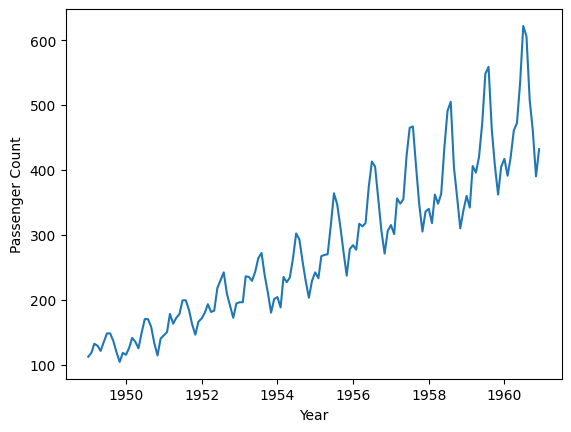

In [4]:
#AirPassengers 데이터 로드
data = pd.read_csv('./data/airline-passengers.csv')
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

print(data)

#데이터 시각화
plt.plot(data)
plt.xlabel('Year')
plt.ylabel('Passenger Count')
plt.show()

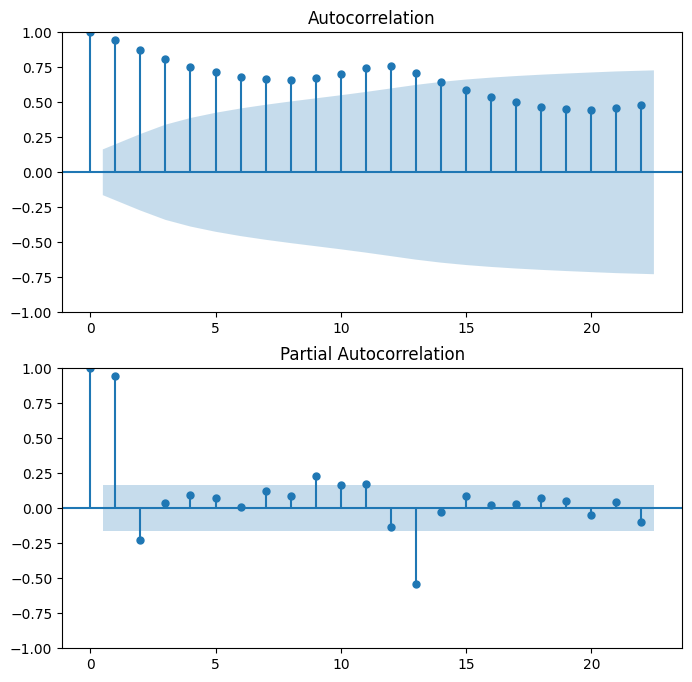

In [5]:
#자기상관 함수(ACF) 및 부분 자기상관 함수(PACF) 그래프
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,8))
plot_acf(data, ax=ax1)
plot_pacf(data, ax=ax2)
plt.show()

### ADF 감정

In [6]:
result = adfuller(data['Passengers'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}: {value}')

ADF Statistic: 0.8153688792060421
p-value: 0.9918802434376409
Critical Values:
1%: -3.4816817173418295
5%: -2.8840418343195267
10%: -2.578770059171598


### ADF 감정은 시계열 데이터의 정상성을 검정진행

In [9]:
#ARIMA 모델 적합
model = ARIMA(data, order=(2, 1, 2))
results = model.fit()

#모델 정보 출력
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Thu, 01 Jun 2023   AIC                           1353.347
Time:                        16:44:01   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.061      0.000       1.645       1.725
ar.L2         -0.9549      0.017    -55.421      0.000      -0.989      -0.921
ma.L1         -1.8432      0.124    -14.856      0.0

/Users/sang-yun/anaconda3/envs/AI/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/sang-yun/anaconda3/envs/AI/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/sang-yun/anaconda3/envs/AI/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/sang-yun/anaconda3/envs/AI/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1950-01-01    121.156581
1950-02-01    120.594531
1950-03-01    132.840013
1950-04-01    146.351585
1950-05-01    137.425969
                 ...    
1961-08-01    539.731914
1961-09-01    508.530093
1961-10-01    478.147994
1961-11-01    456.746548
1961-12-01    449.695016
Freq: MS, Name: predicted_mean, Length: 144, dtype: float64


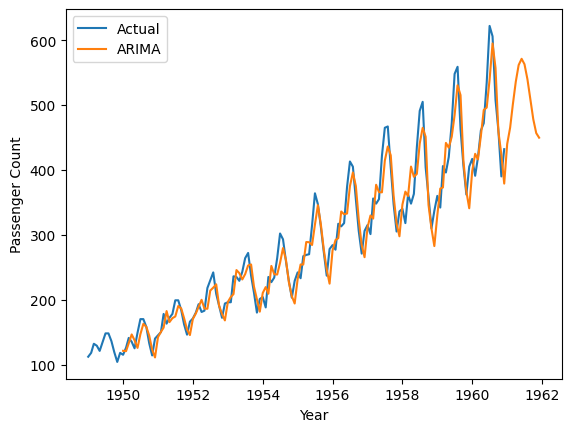

In [10]:
#예측 결과 그래프
pred = results.predict(start='1950-01-01', end='1961-12-01')
print(pred)
plt.plot(data, label='Actual')
plt.plot(pred, label='ARIMA')
plt.xlabel('Year')
plt.ylabel('Passenger Count')
plt.legend()
plt.show()

### 계절성 모델

In [11]:
#시계열 데이터 생성
np.random.seed(0)
n = 100
data = np.random.normal(0, 1, n)
dates = pd.date_range(start='2023-01-01', periods=n, freq='M')

#데이터프레임 생성
df = pd.DataFrame({'Value' : data}, index=dates)
print(df)

               Value
2023-01-31  1.764052
2023-02-28  0.400157
2023-03-31  0.978738
2023-04-30  2.240893
2023-05-31  1.867558
...              ...
2030-12-31  0.706573
2031-01-31  0.010500
2031-02-28  1.785870
2031-03-31  0.126912
2031-04-30  0.401989

[100 rows x 1 columns]


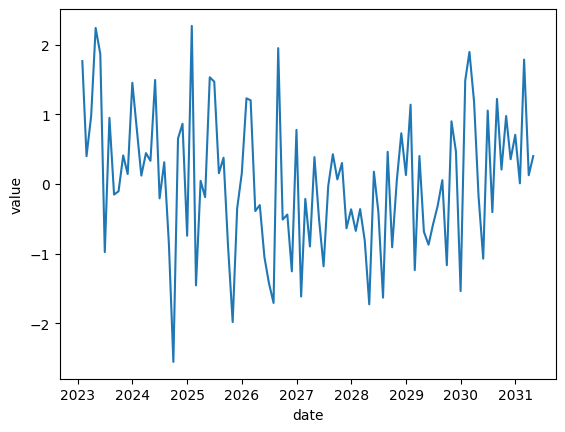

In [12]:
#데이터 시각화
plt.plot(df)
plt.xlabel('date')
plt.ylabel('value')
plt.show()

In [14]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [17]:
#Seasonal ARIMA 모델 적합 및 예측
model = SARIMAX(df, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.45605D+00    |proj g|=  2.08928D-01

At iterate    5    f=  1.35014D+00    |proj g|=  3.29916D-02

At iterate   10    f=  1.34872D+00    |proj g|=  1.06486D-03

At iterate   15    f=  1.34870D+00    |proj g|=  1.63667D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     17      1     0     0   1.637D-06   1.349D+00
  F =   1.3486968460295179     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
